<a href="https://colab.research.google.com/github/Kallil12/Data-Quality/blob/main/data_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
#import numpy as np
#import matplotlib as plt

---
# 1 - A - Read both csv files into Python.
---


In [2]:
# 1A

dealer_data_path = "/content/sample_data/DEALER.csv"
retail_data_path = "/content/sample_data/RETAIL_SALES.csv"

In [3]:
df_dealer = pd.read_csv(dealer_data_path)
df_retail = pd.read_csv(retail_data_path)

<ipython-input-3-8a4cc50ed4c7>:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_retail = pd.read_csv(retail_data_path)


---
# 1 - B - Display the data types for each column for both datasets.
---

In [4]:
# 1B

dealer_data_types = df_dealer.dtypes
retail_data_types = df_retail.dtypes

In [5]:
print("1 B:\n")
print("Data types for the dealer dataset:\n")
print(dealer_data_types)

print("\n----//----//----//----//----//----//----//----")
print("\nData types for the retail dataset:\n")
print(retail_data_types)

1 B:

Data types for the dealer dataset:

CUSTOMER_NUMBER               int64
ATV                          object
ATV_CREATION_DATE            object
CERTIFICATION_LEVEL_CODE    float64
CITY_DEALER                  object
COUNTRY_CODE                 object
DEALER_TYPE_CODE              int64
DEALER_TYPE_DESC             object
GROUP_NUMBER                  int64
PWC                          object
PWC_CREATION_DATE            object
SALES_GROUP                  object
SALES_OFFICE                  int64
SALES_ORG                     int64
SNOW                         object
SNOW_CREATION_DATE           object
SSV                          object
SSV_CREATION_DATE            object
STATE_CODE                   object
TERRITORY_CODE                int64
THREE_W                      object
THREE_W_CREATION_DATE        object
GEOGRAPHY                   float64
dtype: object

----//----//----//----//----//----//----//----

Data types for the retail dataset:

BCI_PROGRAM_CODE        object


---
# 1 - C - What is the number of rows and columns for each dataset?
---

In [6]:
# 1C

dealer_data_rows = df_dealer.shape
retail_data_rows = df_retail.shape

In [7]:
print("1 C:\n")
print("Number of rows and columns in the dealer dataset")
print("# of rows: {}".format(dealer_data_rows[0]))
print("# of columns: {}\n".format(dealer_data_rows[1]))

print("----//----//----//----//----//----//----//----")
print("\nNumber of rows and columns in the retail dataset")
print("# of rows: {}".format(retail_data_rows[0]))
print("# of columns: {}".format(retail_data_rows[1]))

1 C:

Number of rows and columns in the dealer dataset
# of rows: 4153
# of columns: 23

----//----//----//----//----//----//----//----

Number of rows and columns in the retail dataset
# of rows: 134261
# of columns: 21


---
# 1 - D - Display the first 6 rows for the DEALER dataset and the last 8 for the RETAIL_SALES one.
---

In [8]:
# 1D

dealer_top_six = df_dealer.head(6)
retail_bot_eight = df_retail.tail(8)

In [9]:
print("The first 6 rows in the dealer dataset are:")
print(dealer_top_six)

print("\n----//----//----//----//----//----//----//----")
print("\nThe last 8 rows in the retail data set are:")
print(retail_bot_eight)

The first 6 rows in the dealer dataset are:
   CUSTOMER_NUMBER ATV ATV_CREATION_DATE  CERTIFICATION_LEVEL_CODE  \
0           690015   N               NaN                       NaN   
1           690086   N               NaN                       NaN   
2           690107   N               NaN                       NaN   
3           690147   Y         3/11/2000                       NaN   
4           690158   Y         7/14/2008                      20.0   
5           690158   Y         7/14/2008                       NaN   

  CITY_DEALER COUNTRY_CODE  DEALER_TYPE_CODE DEALER_TYPE_DESC  GROUP_NUMBER  \
0  MIDLOTHIAN           US                 1      Retail Only        690015   
1     WARWICK           US                 1      Retail Only        690086   
2      MENTOR           US                 1      Retail Only        690107   
3    AMARILLO           US                 1      Retail Only        690147   
4   MILLSBORO           US                 1      Retail Only        6

---
# 2 - A - Remove duplicated lines in the DEALER dataset. How many of duplicated lines there were?
---

In [10]:
# 2A

df_duplicates_dropped = df_dealer.drop_duplicates(keep='first', inplace=False)

In [11]:
num_duplicates_dropped = len(df_dealer) - len(df_duplicates_dropped)

In [12]:
print("Number of Duplicate Rows Dropped: {}" .format(num_duplicates_dropped))

Number of Duplicate Rows Dropped: 5


In [13]:
df_dealer.drop_duplicates(keep = 'first', inplace=True)

---
# 2 - B - How many NAs exist within the CITY_DEALER column in the DEALER dataset? Replace the NA values for the string:  no city found.
---

In [14]:
# 2B

dealer_na_cities = df_dealer['CITY_DEALER'].isna().sum()
print('There are {} occurrences of NA or empty cities'.format(dealer_na_cities))

There are 3 occurrences of NA or empty cities


In [15]:
df_dealer['CITY_DEALER'].fillna('no city found', inplace = True)

---
# 2 - C - Filter the DEALER dataset to include only dealers with COUNTRY_CODE US or CA.
---

In [16]:
# 2C

df_dealer = df_dealer[(df_dealer['COUNTRY_CODE'] == 'US')|(df_dealer['COUNTRY_CODE'] == 'CA')]

In [17]:
dealer_data_rows_test = df_dealer.shape
print(dealer_data_rows_test)

(4127, 23)


---
# 2 - D - In the RETAIL_SALES dataset, remove the trailing x (xxx) of the column REG_DEALER_NUMBER.
---

In [18]:
# 2D

df_retail['REG_DEALER_NUMBER'] = df_retail['REG_DEALER_NUMBER'].str.replace('x', '', regex=True)

---
# 2 - E - Keep only the following columns in the DEALER dataset: CUSTOMER_NUMBER, CITY_DEALER, COUNTRY_CODE and STATE_CODE.
---

In [19]:
# 2E

df_dealer = df_dealer[['CUSTOMER_NUMBER', 'CITY_DEALER', 'COUNTRY_CODE', 'STATE_CODE']]

In [20]:
#df_dealer

---
# 3 - A - In the RETAIL_SALES dataset, create a column named RETAIL and assign the integer 1 to it.
---

In [21]:
# 3A

df_retail['RETAIL'] = 1

---
# 3 - B - Set the datatypes of columns CUSTOMER_NUMBER and REG_DEALER_NUMBER to integer for the DEALER and RETAIL_SALES datasets respectively
---

In [22]:
# 3B

df_dealer['CUSTOMER_NUMBER'] = df_dealer['CUSTOMER_NUMBER'].astype(int)

<ipython-input-22-18a3de348cad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dealer['CUSTOMER_NUMBER'] = df_dealer['CUSTOMER_NUMBER'].astype(int)


In [23]:
# 3B

df_retail['REG_DEALER_NUMBER'] = df_retail['REG_DEALER_NUMBER'].astype(int)

---
# 3 - C - In the DEALER dataset, create a column called REGION_CODE based on the STATE_CODE columns. Each region is specified as per the dictionary provided in the original doc.
---

In [24]:
# 3C

region_mapping = {
    1: ["AB", "BC", "MB", "NB", "NF", "NS", "NT", "NU", "ON", "PE", "QC", "SK", "YT"],
    2: ["AL", "CT", "DE", "DC", "FL", "GA", "MA", "MD", "ME", "NC", "NH", "NJ", "NY", "PA", "PR", "RI", "SC", "VA", "VT", "WV"],
    3: ["AR", "IA", "IL", "IN", "KS", "KY", "LA", "MI", "MN", "MO", "MS", "ND", "NE", "OH", "SD", "TN", "WI"],
    4: ["AK", "AZ", "CA", "CO", "HI", "ID", "MT", "NM", "NV", "OK", "OR", "TX", "UT", "WA", "WY"]
}

df_dealer['REGION_CODE'] = df_dealer['STATE_CODE'].apply(
    lambda state: next((region for region, states in region_mapping.items() if state in states), 5)
)

---
# 4 - A - Merge the DEALER dataset into the RETAIL_SALES using CUSTOMER_NUMBER and REG_DEALER_NUMBER columns. Explain why you selected this specific join type.
---

In [25]:
# 4A

df_merged_data = pd.merge(df_retail, df_dealer, left_on = 'REG_DEALER_NUMBER', right_on = 'CUSTOMER_NUMBER', how = 'inner')


---
# 4 - B - I - What is the overall top selling MODEL_CODE in the STATE_CODE of AZ and MB? Use the RETAIL column to calculate sales.
---

In [26]:
# 4B I
# MODEL_CODE does not exist, I'll use MODEL_NUMBER instead
top_selling_overall = df_merged_data[df_merged_data['STATE_CODE'].isin(['AZ','MB'])].groupby('MODEL_NUMBER')['RETAIL'].sum().idxmax()
top_selling_AZ = df_merged_data[df_merged_data['STATE_CODE'].isin(['AZ'])].groupby('MODEL_NUMBER')['RETAIL'].sum().idxmax()
top_selling_MB = df_merged_data[df_merged_data['STATE_CODE'].isin(['MB'])].groupby('MODEL_NUMBER')['RETAIL'].sum().idxmax()

In [27]:
top_selling_overall

'0009NCA00'

In [30]:
print('The overall best selling model is:{} \n'.format(top_selling_overall))
print('The best selling model in AZ is:{} \n'.format(top_selling_AZ))
print('The best selling model in MB is:{} \n'.format(top_selling_MB))

The overall best selling model is:0009NCA00 

The best selling model in AZ is:0009NCA00 

The best selling model in MB is:0008JCA00 



---
# 4 - B - II - What are the top 10 MODEL_CODEs sold in REGION_CODE number 3, in the year 2021? Use REGISTRATION_DATE to calculate the dates.
---

In [31]:
df_merged_data['REGISTRATION_DATE'] = pd.to_datetime(df_merged_data['REGISTRATION_DATE'], format='%m/%d/%Y')

In [32]:
df_merged_data['REG_YEAR'] = df_merged_data['REGISTRATION_DATE'].dt.year

In [33]:
filtered_data = df_merged_data[(df_merged_data['REGION_CODE'] == 3) & (df_merged_data['REG_YEAR'] == 2021)]

In [34]:
model_sales = filtered_data.groupby('MODEL_NUMBER')['RETAIL'].sum()

In [35]:
top_10_models_2021 = model_sales.nlargest(10)

In [36]:
print(top_10_models_2021)

MODEL_NUMBER
0008JCA00    2147
0008JCC00    1199
0005CCG00     907
0005CCA00     888
0005CCB00     828
0008ACA00     593
0009CCA00     519
0002TCC00     510
0008CCA00     496
0005JCA00     451
Name: RETAIL, dtype: int64


---
# 4 - B - III - Create a chart to display the total sales per REGION_CODE and year.dates.
---

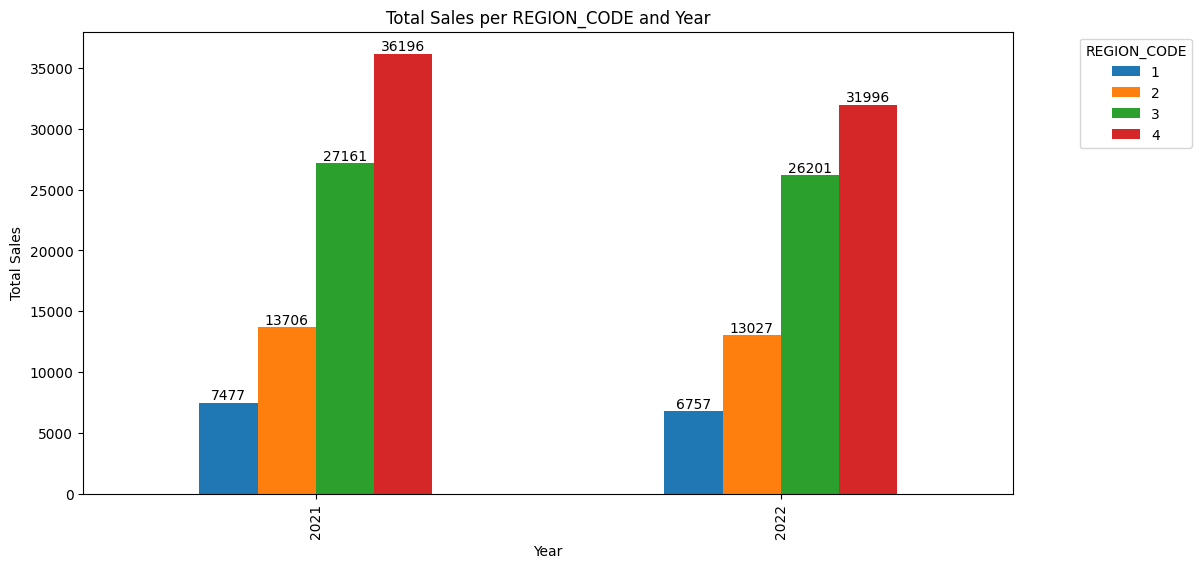

In [37]:
import matplotlib.pyplot as plt

# Group the data by REGION_CODE and REG_YEAR and calculate the total sales
total_sales_per_region_year = df_merged_data.groupby(['REGION_CODE', 'REG_YEAR'])['RETAIL'].sum()

# Reset the index to make REGION_CODE and REG_YEAR columns accessible for plotting
total_sales_per_region_year = total_sales_per_region_year.reset_index()

# Create a pivot table to reshape the data for plotting
pivot_table = total_sales_per_region_year.pivot(index='REG_YEAR', columns='REGION_CODE', values='RETAIL')

# Plot the data as a bar chart
ax = pivot_table.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales per REGION_CODE and Year')
plt.legend(title='REGION_CODE', loc='upper right', bbox_to_anchor=(1.2, 1))

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()